# Flipkart Reviews Sentiment Analysis using Python


Sentiment analysis is a NLP task used to determine the sentiment behind textual data. In context of product reviews it helps in understanding whether the feedback given by customers is positive, negative or neutral. It helps businesses gain valuable insights about customer experiences, product quality and brand perception. It helps in improving product quality and refining customer service strategies.

In this article, we will explore how to apply machine learning techniques to perform sentiment analysis on Flipkart reviews.

## Code Implementation of Sentiment Analysis on Flipkart Reviews


### 1. Importing Libraries and Dataset

We will be using libraries like [Pandas](https://pandas.pydata.org/), [Scikit-learn](https://scikit-learn.org/stable/), [NLTK](https://www.nltk.org/), [Matplotlib](https://matplotlib.org/), [WordCloud](https://amueller.github.io/word-cloud/), and [Seaborn](https://seaborn.pydata.org/) for this. 

You can download the dataset by clicking this [Link](https://media.geeksforgeeks.org/wp-content/uploads/20240923174013/flipkart_data.csv).

In [22]:
import pandas as pd # Used for loading, handling, and analyzing dataset (data manipulation)
import nltk #  Used for natural language processing tasks like tokenization, stopword removal, and text preprocessing
from nltk.corpus import stopwords # Used to remove common words (like 'is', 'the', 'and') that don't add much meaning to the text
from sklearn.model_selection import train_test_split # Used to split the dataset into training and testing sets for model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text to numerical form
from sklearn.tree import DecisionTreeClassifier #  For building a decision tree model
from sklearn.metrics import accuracy_score, confusion_matrix # To evaluate model accuracy and predictions
import matplotlib.pyplot as plt # For creating graphs and visualizations
from wordcloud import WordCloud # To create a word cloud showing most frequent words
import seaborn as sns # For creating attractive and easy-to-read data visualizations


In [23]:
df = pd.read_csv('flipkart_data.csv')
# Load the Flipkart dataset from the CSV file into a pandas DataFrame

# Assign sentiment based on rating values
# 1-2 = Negative, 3 = Neutral, 4-5 = Positive
def get_sentiment(rating): #     # Define a function that returns sentiment according to the rating
    if rating <= 3:
        return "Negative" # Ratings 1 or 2 are considered Negative
    elif  rating == 3:
        return "Neutral" # Rating 3 is considered Neutral
    else:
        return "Positive" # # Ratings 4 or 5 are considered Positive
df['sentiment'] = df['rating'].apply(get_sentiment)
# Apply the function to the 'rating' column to create a new 'sentiment' column

# check the result
df.head()
# Display the first 5 rows of the DataFrame to verify that sentiments were assigned correctly

,review,rating,sentiment
0,It was nice produt. I like it's design a lot. ...,5,Positive
1,awesome sound....very pretty to see this nd th...,5,Positive
2,awesome sound quality. pros 7-8 hrs of battery...,4,Positive
3,I think it is such a good product not only as ...,5,Positive
4,awesome bass sound quality very good bettary l...,5,Positive


### 2. Preprocessing the Data


The next step is [preprocessing the data](https://www.geeksforgeeks.org/dbms/data-preprocessing-in-data-mining/) which involves cleaning the review text and preparing the sentiment labels. We'll start by converting the reviews to lowercase and removing stopwords to make text more manageable. Then we will convert ratings (from 1 to 5) into binary sentiment labels like 1 for positive reviews (ratings 4 and 5) and 0 for negative reviews (ratings 3 and below).

In [24]:
nltk.download('stopwords') 
# Download the list of common stopwords (like 'is', 'the', 'and') from the NLTK library
stop_words = set(stopwords.words('english'))
# Create a set of English stopwords to use for removing them from the reviews

def preprocess_review_stopwords(df):     # Define a function to clean and preprocess the review text
    df['review'] = df['review'].str.lower()
# Convert all review text to lowercase to maintain consistency (so 'Good' and 'good' are treated the same)
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Remove stopwords from each review (only keep useful words that carry meaning)
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
 # Create a 'sentiment' column based on rating — 1 for Positive (rating 4 or 5), 0 for Negative (1–3)

    return df
# Return the cleaned and processed DataFrame


df_cleaned = preprocess_review_stopwords(df)
# Apply the preprocessing function to the original DataFrame and store the cleaned data in 'df_cleaned'

[nltk_data] Downloading package stopwords to C:\Users\RUDRA
[nltk_data]     BARMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3. Visualizing the Data

Before we proceed with model making it's important to explore the dataset. We can visualize the distribution of sentiment labels and analyze the frequency of words in positive reviews.

### Sentiment Distribution


To understand the overall sentiment distribution, we will use a bar plot to visualize the counts of positive and negative reviews.

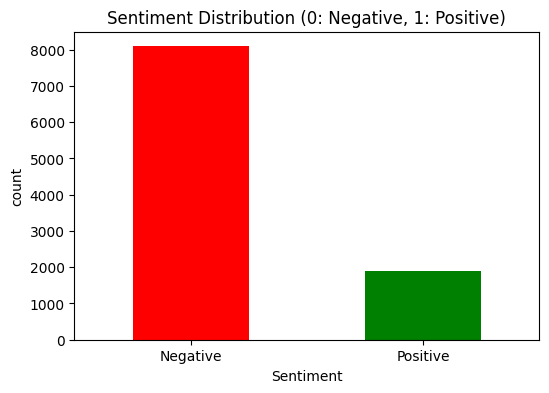

In [25]:
sentiment_counts = df_cleaned['sentiment'].value_counts() 
# Count how many reviews are Positive (1) and Negative (0) in the dataset

plt.figure(figsize=(6, 4)) # Set the size of the plot (width = 6 inches, height = 4 inches)
sentiment_counts.plot(kind= 'bar', color= ['red', 'green'])
# Create a bar chart to show sentiment counts (red for negative, green for positive)
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
# Add a title to the chart for better understanding
plt.xlabel('Sentiment')
# Label the x-axis as "Sentiment"
plt.ylabel('count') # Label the y-axis as "Count" to show how many reviews there are
plt.xticks(ticks=[0, 1],labels=['Negative', 'Positive'], rotation=0)
# Rename x-axis ticks to 'Negative' and 'Positive', and keep them horizontal (no rotation)

plt.show() # Display the bar chart on the screen

### Word Cloud for Positive Reviews

Next, we'll create a [Wordcloud](https://www.geeksforgeeks.org/python/generate-word-clouds-of-any-shape-in-python/) to visualize the most frequent words in positive reviews. This can help us understand the common themes in customer feedback.

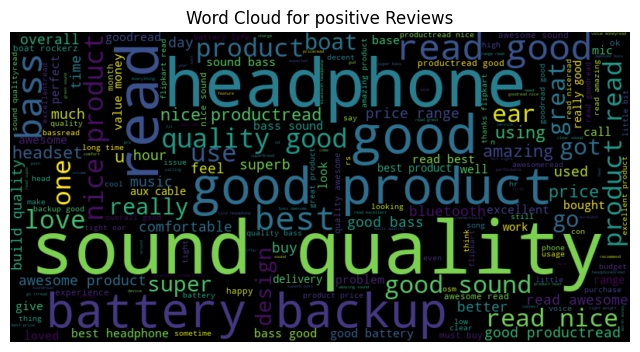

In [26]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
# Filter only the reviews where sentiment = 1 (Positive reviews)
positive_text = ' '.join(positive_reviews) # Combine all positive reviews into one large text string for word cloud generation
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
# Create a WordCloud object and generate the word cloud from the combined positive text

plt.figure(figsize=(8, 6)) # Set the size of the figure (width = 8 inches, height = 6 inches)
plt.imshow(wordcloud, interpolation='bilinear') # Display the word cloud image using matplotlib
plt.axis('off') # Hide the x and y axis for a cleaner look
plt.title('Word Cloud for positive Reviews') # Add a title to the chart to describe what it represents
plt.show() # Display the final word cloud visualization

### 4. Vectorizing the Text Data

Machine learning models require numerical input so we need to convert the textual reviews into numerical vectors. We will use [TF-IDF(Term Frequency-Inverse Document Frequency)](https://www.geeksforgeeks.org/machine-learning/understanding-tf-idf-term-frequency-inverse-document-frequency/) which helps converting these texts into vectors.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Import TfidfVectorizer, which converts text data into numerical feature vectors based on word importance

vectorizer = TfidfVectorizer(max_features=5000) 
# Create a TF-IDF vectorizer object and limit it to the top 5000 most important words to reduce complexity
x = vectorizer.fit_transform(df_cleaned['review'])
# Transform the 'review' column (text data) into a TF-IDF matrix (numerical representation of words)
y = df_cleaned['sentiment']
# Store the target labels (sentiments: 0 = Negative, 1 = Positive) in variable 'y'

### 5. Model Training, Evaluation and Prediction

Now that the data is prepared we can split it into training and testing sets where 80% data is used for training and rest is used for testing. We will train a [Decision Tree Classifier](https://www.geeksforgeeks.org/machine-learning/building-and-implementing-decision-tree-classifiers-with-scikit-learn-a-comprehensive-guide/) on the training data and evaluate its performance on the test data. We will also measure the model's accuracy and generate a [confusion matrix](https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/) to analyze the predictions.

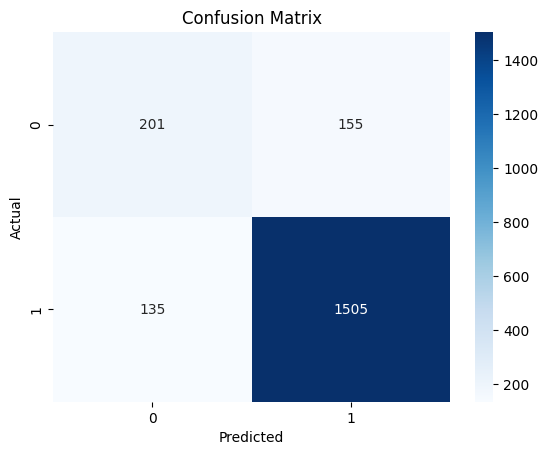

0.8547094188376754


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Split the dataset into training and testing sets (80% for training, 20% for testing)
# random_state=42 ensures consistent results every time you run the code

model = DecisionTreeClassifier(random_state=42) # Create a Decision Tree Classifier model with a fixed random state for reproducibility

model.fit(x_train, y_train) 
# Train (fit) the model using the training data so it can learn the relationship between reviews and sentiments

y_pred = model.predict(x_test) # Use the trained model to predict sentiments on the test data
accuracy = accuracy_score(y_test, y_pred) # Calculate how accurate the model’s predictions are compared to the actual test labels
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a confusion matrix to see how many predictions were correct or incorrect for each class

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# Visualize the confusion matrix as a heatmap (blue color, showing counts with annotations)
plt.title('Confusion Matrix') # Add a title to the heatmap plot
plt.xlabel('Predicted') # Label the x-axis as “Predicted” (model’s predictions)
plt.ylabel('Actual') # Label the y-axis as “Actual” (true values from the dataset)
plt.show()
print(accuracy) # Print the model’s overall accuracy score


We are able to classify reviews as positive or negative with an accuracy of **approximately 86%** which is great for a machine learning model but we can further fine tune this model to get better accuracy for more complex task. With this businesses can gain valuable insights into customer satisfaction and make data-driven decisions to improve their products and services.